In [4]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf # librosa fails when reading files on Kaggle.

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("D:\\Project Working\\RAVDESS\\actor_data.csv")
df.head()

,Actor_ID,Folder_Name,File_Name
0,1,Actor_01,03-01-01-01-01-01-01.wav
1,1,Actor_01,03-01-01-01-01-02-01.wav
2,1,Actor_01,03-01-01-01-02-01-01.wav
3,1,Actor_01,03-01-01-01-02-02-01.wav
4,1,Actor_01,03-01-02-01-01-01-01.wav


In [6]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\RAVDESS\\' + str(df["Folder_Name"][i]) + '\\' + df["File_Name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["Actor_ID"][i])

    return features, labels

In [7]:
x, y = parser()

In [8]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(1440, 128)
(1440,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1080, 128), (1080,), (360, 128), (360,))

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred=neigh.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 4,  0,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  4,  0,
         0,  0,  0,  0,  0,  0,  3,  0],
       [ 0, 10,  0,  3,  0,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  0,  4,  0,  2,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  4,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  2,  0,  0,  0,  2],
       [ 1,  0,  2,  0,  1,  0,  3,  1,  0,  0,  0,  1,  3,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0,  5,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  0,  1,  0,  0,  0,  8,  0,  0,  0,  3,  0,  0,  0,
         0,  0,  1,  0, 

In [15]:
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.4194


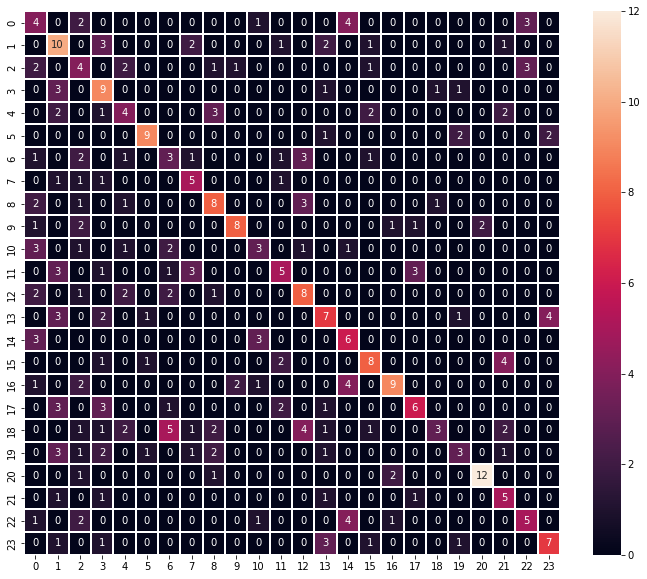

In [16]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, linewidths = 2, fmt="d") 
           
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.20      0.29      0.24        14
           2       0.33      0.50      0.40        20
           3       0.19      0.29      0.23        14
           4       0.35      0.60      0.44        15
           5       0.31      0.29      0.30        14
           6       0.75      0.64      0.69        14
           7       0.21      0.23      0.22        13
           8       0.38      0.56      0.45         9
           9       0.44      0.50      0.47        16
          10       0.73      0.53      0.62        15
          11       0.33      0.25      0.29        12
          12       0.42      0.31      0.36        16
          13       0.42      0.50      0.46        16
          14       0.39      0.39      0.39        18
          15       0.32      0.50      0.39        12
          16       0.53      0.50      0.52        16
          17       0.69      0.47      0.56        19
          18       0.55    